In [1]:
from qcutils.benchmarks import QASMBenchmark
from qcutils.benchmarks import PulseMetric
from qcutils.pulse.amptimeseries import circ_to_amp_time_series
from qiskit import IBMQ
from qiskit import QuantumCircuit
import itertools
import matplotlib.pyplot as plt
import numpy as np

IBMQ.load_account()
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibm_lagos")

bm = QASMBenchmark(r"../../QASMBench", "small", num_qubit=list(range(7)))
pm = PulseMetric(bm, backend=backend)


C:\Users\legendx\AppData\Local\Temp\ipykernel_30796\3745277442.py:10: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account()
C:\Users\legendx\AppData\Local\Temp\ipykernel_30796\3745277442.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


Text(0, 0.5, 'Mean Power')

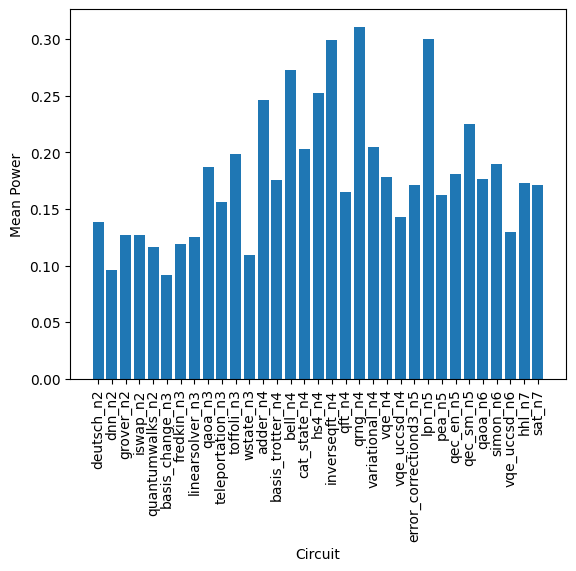

In [2]:
amp_timeseries_dict = pm.to_mean_amp_timeseries_dict(scale = 1, do_transpile=True)

circ_name_list = []
mean_amp_list = []
for circ_name, mean_amp in amp_timeseries_dict.items():
    circ_name_list.append(circ_name)
    mean_amp_list.append(mean_amp)

plt.bar(circ_name_list, mean_amp_list)
plt.xticks(rotation=90)
plt.xlabel("Circuit")
plt.ylabel("Mean Power")

# plt.savefig("./mean_power.pdf", bbox_inches = "tight")


Text(0, 0.5, 'Mean Power')

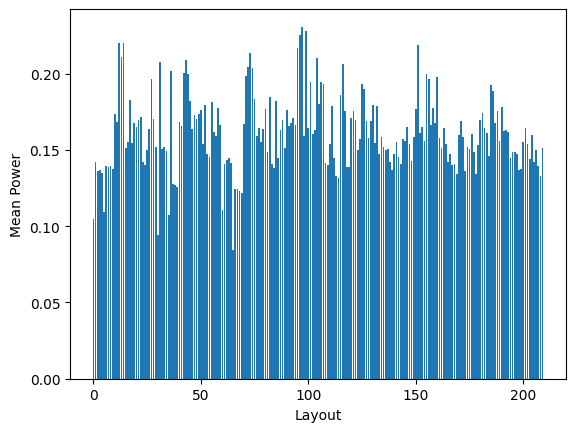

In [3]:
circ = QuantumCircuit.from_qasm_file(r"../../QASMBench/small/toffoli_n3/toffoli_n3.qasm")
mean_amp_list = [np.mean(circ_to_amp_time_series(circ, backend, total=True, do_transpile=True, initial_layout=list(layout), use_channel=False)) for layout in list(itertools.permutations(list(range(7)), 3))]

plt.bar(range(len(mean_amp_list)), mean_amp_list)
plt.xlabel("Layout")
plt.ylabel("Mean Power")
# plt.savefig("./mean_power_layout.pdf", bbox_inches = "tight")